In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [3]:
data =pd.read_csv(r"C:\Users\dell\Downloads\Drug classification model\dataset.csv")

In [4]:
#EDA
data.head()

,patient_id,name,gender,age,race,side_effects
0,48683,Justin Hopkins,female,10-20,Hispanic,No Side Effects
1,101343,Heather Murphy,male,40-50,Asian,Mild Side Effects
2,66360,Michael Burns,female,50-60,White,Extremely Severe Side Effects
3,244456,Amy Elliott,female,50-60,White,Moderate Side Effects
4,7720,Alexander Johnson,male,20-30,Black,Moderate Side Effects


In [5]:
data.shape

(400000, 6)

In [6]:
data.dtypes.value_counts()

object    5
int64     1
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   patient_id    400000 non-null  int64 
 1   name          400000 non-null  object
 2   gender        400000 non-null  object
 3   age           400000 non-null  object
 4   race          400000 non-null  object
 5   side_effects  400000 non-null  object
dtypes: int64(1), object(5)
memory usage: 18.3+ MB


In [10]:
#checking for null values
data.isnull().sum()

patient_id      0
name            0
gender          0
age             0
race            0
side_effects    0
dtype: int64

In [11]:
#checking for missing values
data.isna().sum()

patient_id      0
name            0
gender          0
age             0
race            0
side_effects    0
dtype: int64

In [12]:
#checking data types
data.dtypes

patient_id       int64
name            object
gender          object
age             object
race            object
side_effects    object
dtype: object

In [13]:
#cleaning the data
data_clone=data
data = data.drop(['patient_id','name'], axis = 1)
data.head()

,gender,age,race,side_effects
0,female,10-20,Hispanic,No Side Effects
1,male,40-50,Asian,Mild Side Effects
2,female,50-60,White,Extremely Severe Side Effects
3,female,50-60,White,Moderate Side Effects
4,male,20-30,Black,Moderate Side Effects


In [14]:
data.isna().sum()

gender          0
age             0
race            0
side_effects    0
dtype: int64

In [15]:
#checking duplicate
data.duplicated().sum()

399600

In [16]:
num_data=data.select_dtypes(include=['int64','float64'])
num_data

""
0
1
2
3
4
...
399995
399996
399997
399998


In [17]:
cat_data=data.select_dtypes(include=['object'])
cat_data

,gender,age,race,side_effects
0,female,10-20,Hispanic,No Side Effects
1,male,40-50,Asian,Mild Side Effects
2,female,50-60,White,Extremely Severe Side Effects
3,female,50-60,White,Moderate Side Effects
4,male,20-30,Black,Moderate Side Effects
...,...,...,...,...
399995,female,60-70,Black,Extremely Severe Side Effects
399996,female,70-80,Hispanic,No Side Effects
399997,female,80-90,Asian,No Side Effects
399998,female,70-80,White,Moderate Side Effects


<AxesSubplot:ylabel='race'>

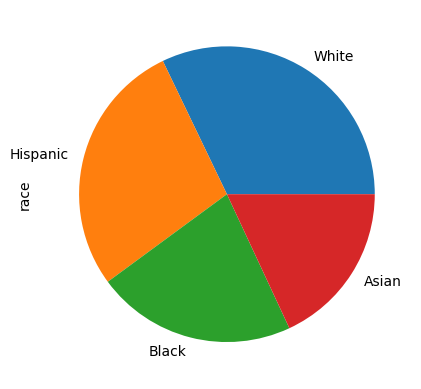

In [18]:
#univariate analysis
data['race'].value_counts().plot(kind="pie")

In [19]:
data['race'].value_counts()

White       128541
Hispanic    111821
Black        87410
Asian        72228
Name: race, dtype: int64

In [ ]:
# from this we an see that white race is more

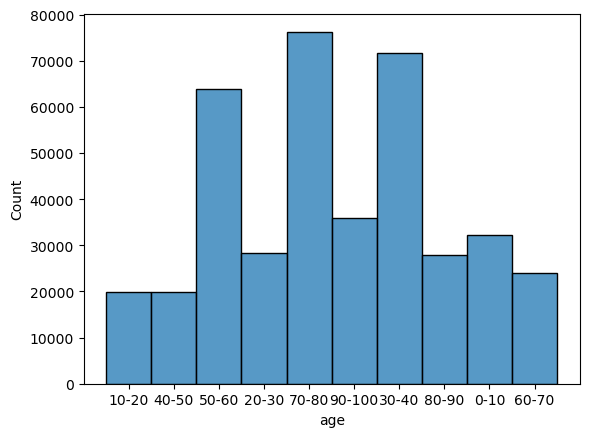

In [20]:
# plt.figure(figsize=(12,4))
sns.histplot(data['age'],bins=50);

In [22]:
#by analysing the graph people of age  70-80 is more

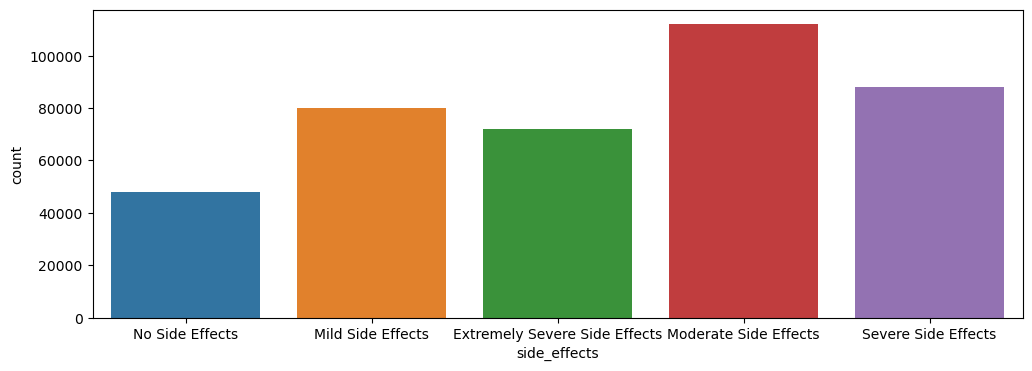

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x='side_effects',data=data);

In [ ]:
# by analysing the graph people having moderate side effect is high

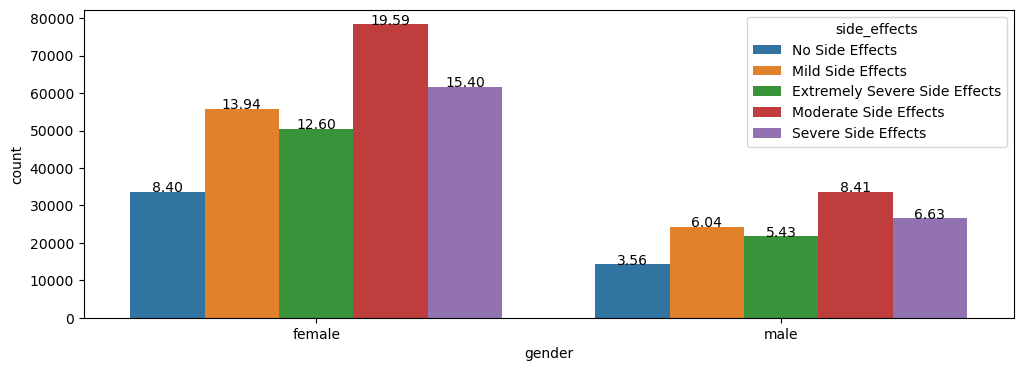

In [30]:
#bivariate analysis
plt.figure(figsize=(12,4))
total = float(len(data["side_effects"]) )

ax = sns.countplot(x="gender", hue="side_effects", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

In [31]:
#by analysing the graph we can see that number of female is more compared with male in case with side effects and without side effects

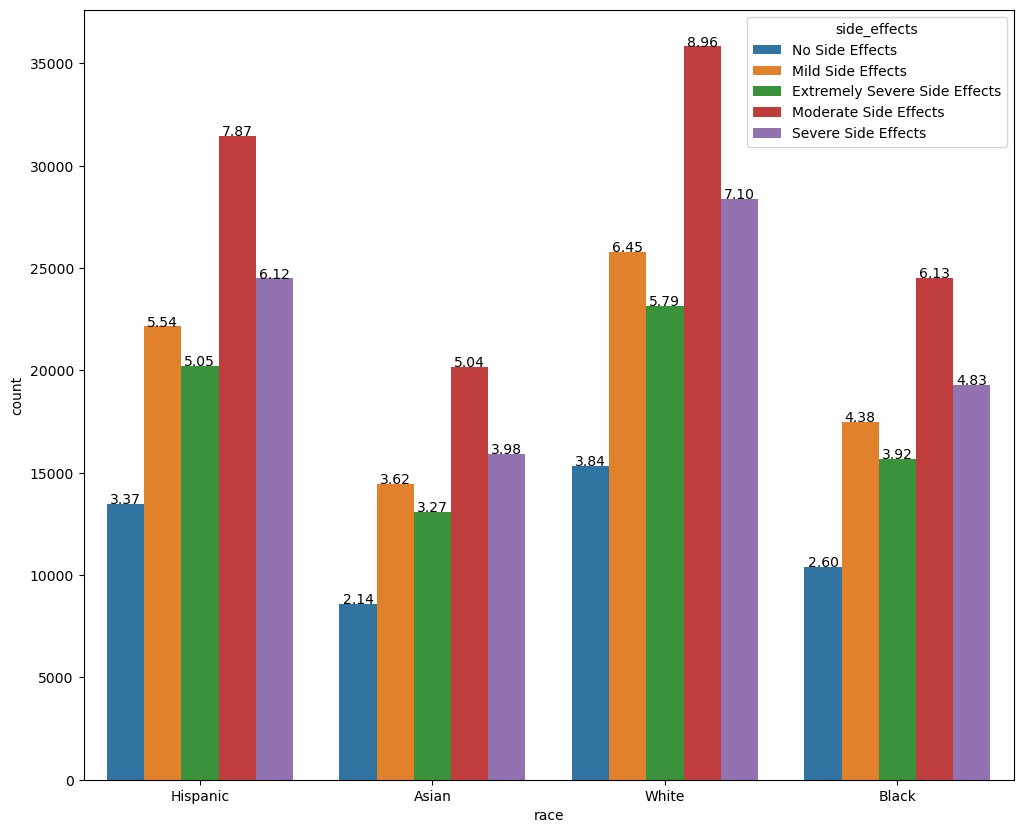

In [32]:
plt.figure(figsize=(12,10))
total = float(len(data["side_effects"]) )

ax = sns.countplot(x="race", hue="side_effects", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

In [33]:
#from above graph we can see that people wth no side effect is less in asian race and severe side effects in white race